To sum up:
* we need to implement circuit, where U apply PauliX gate on randomly one qubit.
![circuit](./images/The%20Change%20of%20Qubit-2.png)
* based on [Shor's code](https://codebook.xanadu.ai/E.3)

**The Change of Qubit**

Backstory

Zenda needs to send an email to Reece through Trine's Designs' Quantum Area Network. The network is a quantum circuit that simply swaps qubits between wires. However, a virus seems to be interfering with proper communication within the network. Zenda can't get rid of the virus, but she has figured out what it's doing. Let's help her reprogram the network to get around the issue.

More than just a SWAP

This challenge's statement is very simple, but solving it may not be so easy. The goal will be to move a state $\Ket{\psi}$  from one qubit to another, as shown in the figure:
![circuit](./images/The%20Change%20of%20Qubit-1.png)
Easy, isn't it? Well, we are going to complicate it a little bit. We will not allow any direct connections between the first and last qubits, so you will have to use the middle qubit to pass the information from one qubit to another.
The exercise has become more challenging, but we still want to complicate it further! In addition to all of the above, we are going to generate a virus operator $U$ and place it in the middle of the circuit, like so:
![circuit](./images/The%20Change%20of%20Qubit-2.png)
In this case, $U$ consists of one `PauliX` gate that we place randomly in one of the three qubits (each time, the gate is generated in a different wire). You should be able to complete the circuit so that, regardless of the randomly generated operator $U$, you are able to move the state from the first qubit to the last qubit.

In [16]:
import json
import pennylane as qml
import pennylane.numpy as np
from IPython.core.display_functions import display

In [72]:
def his_circuit_left():
    """
    This function corresponds to the circuit on the left-hand side of the diagram in the
    description. Simply place the necessary operations, you do not have to return anything.
    """
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,2])
    qml.broadcast(qml.Hadamard,wires=range(3), pattern='single')

def his_circuit_right():
    """
    This function corresponds to the circuit on the right-hand side of the diagram in the
    description. Simply place the necessary operations, you do not have to return anything.
    """
    qml.broadcast(qml.Hadamard,wires=range(3), pattern = 'single')
    qml.PauliZ(wires=0)
    qml.CNOT(wires=[1,0])
    qml.CNOT(wires=[2,1])


In [112]:
def circuit_left():
    """
    This function corresponds to the circuit on the left-hand side of the diagram in the
    description. Simply place the necessary operations, you do not have to return anything.
    """
    #qml.CNOT(wires=[0,1])
    #qml.CNOT(wires=[0,2])
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,2])

def circuit_right():
    """
    This function corresponds to the circuit on the right-hand side of the diagram in the
    description. Simply place the necessary operations, you do not have to return anything.
    """
    qml.CNOT(wires=[1,0])
    qml.CNOT(wires=[2,1])
    #qml.CNOT(wires=[2,1])
    #qml.CNOT(wires=[2,0])

    qml.Toffoli(wires=range(3))


In [129]:
def U():
    """This operator generates a PauliX gate on a random qubit"""
    qml.PauliX(wires=np.random.randint(3))


dev = qml.device("default.qubit", wires=3)

@qml.qnode(dev)
def circuit(alpha, beta, gamma):
    """Total circuit joining each block.

    Args:
        alpha (float): The first parameter of a U3 gate.
        beta (float):The second parameter of a U3 gate.
        gamma (float): The third parameter of a U3 gate.

    Returns:
        (float): The expectation value of an observable.
    """
    qml.U3(alpha, beta, gamma, wires=0)
    #his_circuit_left()
    circuit_left()
    U()
    circuit_right()
    #his_circuit_right()

    # Here we are returning the expected value with respect to any observable,
    # the choice of observable is not important in this exercise.

    return qml.expval(0.5 * qml.PauliZ(2) - qml.PauliY(2))

tensor(-0.97322082, requires_grad=True)

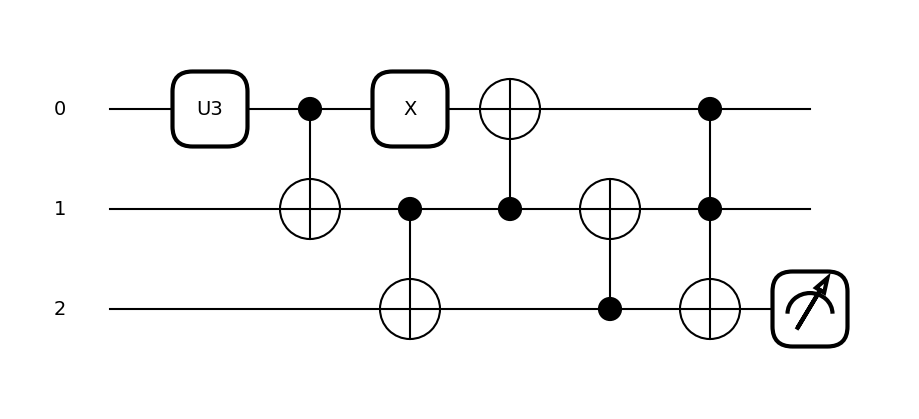

In [124]:
angles = [2.0,1.0,3.0]
qml.draw_mpl(circuit)(*angles)
circuit(*angles)

In [130]:
# These functions are responsible for testing the solution.
def run(test_case_input: str) -> str:
    angles = json.loads(test_case_input)
    output = circuit(*angles)
    return str(output)

def check(solution_output: str, expected_output: str) -> None:

    solution_output = json.loads(solution_output)
    expected_output = json.loads(expected_output)
    print('solution: ',solution_output)
    print('expected_output: ',expected_output)
    assert np.allclose(solution_output, expected_output), "The expected output is not quite right."


    ops = circuit.tape.operations
    for op in ops:
        if(0 in op.wires and 2 in op.wires):
            print(op)
        assert not (0 in op.wires and 2 in op.wires), "Invalid connection between qubits."

    assert circuit.tape.observables[0].wires == qml.wires.Wires(2), "Measurement on wrong qubit."

In [14]:
test_cases = [['[2.0,1.0,3.0]', '-0.97322'], ['[-0.5,1.2,-1.2]', '0.88563'], ['[0.22,3.0,2.1]', '0.457152'], ['[2.22,3.1,-3.3]', '-0.335397'], ['[-0.2,-0.1,3.4]', '0.470199'], ['[-1.2,-1.1,0.4]', '-0.6494612']]

In [131]:
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input '[2.0,1.0,3.0]'...
solution:  -0.9732208195078637
expected_output:  -0.97322
Toffoli(wires=[0, 1, 2])


AssertionError: Invalid connection between qubits.